In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import math
import plotly.express as px
import seaborn as sns

In [5]:
df=pd.read_csv('cleaned_data (1)')
df=df.drop(['Unnamed: 0'],axis=1)
df

,region,province,name,tc,cres,csor,istat,area,pop,alt,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.000000,...,33956781,60.07,3.000000,285.000000,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.000000,...,2411867,75.93,3.000000,11.000000,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.000000,...,2159322,78.49,3.000000,49.000000,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.000000,...,3651915,78.89,3.000000,165.000000,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.000000,...,7195880,42.06,1.000000,60.000000,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,Veneto,Vicenza,unknown2,122.500000,44.320000,43.590000,24125,20.709681,5031,162.489362,...,2113374,71.70,2.989247,68.373626,9.898176,11.296785,7.231159,4.452678,9.637836,7.002821
4337,Lombardia,Varese,unknown3,126.220001,51.250000,22.620001,12143,8.419592,2623,316.642857,...,1240725,79.55,3.000000,44.833402,38.501492,4.551430,7.231159,5.027392,9.624770,7.037059
4338,Veneto,Belluno,unknown4,94.190002,17.080000,47.700001,25074,73.694736,13515,477.842105,...,5554469,88.30,2.947368,114.016667,9.898176,11.296785,7.231159,3.963644,9.650623,7.237466
4339,Veneto,Vicenza,unknown5,169.559998,70.230003,75.250000,24127,20.709681,4683,162.489362,...,2172620,67.73,2.989247,68.373626,9.898176,11.296785,7.231159,4.452678,9.637836,7.002821


In [6]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)
numeric.remove('finance')
#numeric.remove('gdp')
numeric

['tc',
 'cres',
 'csor',
 'istat',
 'area',
 'pop',
 'alt',
 'isle',
 'sea',
 'pden',
 'wden',
 'urb',
 'd_fee',
 'sample',
 'organic',
 'paper',
 'glass',
 'wood',
 'metal',
 'plastic',
 'raee',
 'texile',
 'other',
 'msw_so',
 'msw_un',
 'msw',
 'sor',
 'geo',
 'roads',
 's_wteregio',
 's_landfill',
 'gdp',
 'proads',
 'wage']

In [7]:
df2=df
df2=df2.drop('region',axis=1)
df1=df2.groupby('province').count()
df1=df1.reset_index()
drop_province=df1[df1.name<50]
province=df1[df1.name>=50]
province=list(province.province)
drop_province=list(drop_province.province)
#df3[df3.province==province]
print(len(set(province)))
for i in drop_province:
  df2=df2.drop(df2.index[(df2["province"] == i)])
print(province)
df2.province.value_counts()
#df2.head()


29
['Avellino', 'Benevento', 'Bergamo', 'Biella', 'Bologna', 'Bolzano', 'Brescia', 'Caserta', 'Chieti', 'Como', 'Cosenza', 'Cremona', 'Imperia', 'Lecco', 'Mantova', 'Milano', 'Monza e della Brianza', 'Napoli', 'Padova', 'Pavia', 'Pordenone', 'Potenza', 'Roma', 'Salerno', 'Savona', 'Sondrio', 'Udine', 'Varese', 'Vicenza']


Bergamo                  218
Brescia                  172
Milano                   131
Bolzano                  115
Salerno                  112
Como                     106
Cremona                  102
Udine                    102
Varese                    99
Vicenza                   97
Pavia                     94
Lecco                     80
Napoli                    80
Avellino                  79
Caserta                   78
Roma                      70
Cosenza                   69
Chieti                    69
Biella                    64
Mantova                   63
Sondrio                   62
Padova                    60
Savona                    59
Benevento                 56
Bologna                   54
Monza e della Brianza     54
Potenza                   54
Imperia                   52
Pordenone                 50
Name: province, dtype: int64

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()
dict1={}
for i in province:
  #print(i)
  df3=df2[df2['province']==i]
  #print(df3.isnull().sum())
  #print(df3.finance)
  #print(df3.shape)
  X=df3[numeric]
  #print(X.shape)
  X = sc_X.fit_transform(X)
  y=df3.finance
  #print(y.shape)
  
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
  rf = RandomForestRegressor(bootstrap=True,
  max_depth= 80,
  max_features= 3,
  min_samples_leaf= 3,
  min_samples_split= 8,
  n_estimators=300,
  random_state= 42)
  rf.fit(X_train,y_train)
  y_predict=rf.predict(X_test)
  r2=rf.score(X_test, y_test)
  #print(r2)
  dict1.update({i:r2})
print(dict1)

{'Avellino': 0.525635672078931, 'Benevento': 0.4269274597953512, 'Bergamo': 0.7406838166018421, 'Biella': 0.3250543267298298, 'Bologna': 0.5757355298629947, 'Bolzano': 0.3796672062956473, 'Brescia': 0.5791745671608761, 'Caserta': 0.6750369195422004, 'Chieti': 0.1158082514840032, 'Como': 0.5901124649688063, 'Cosenza': 0.48434548217197604, 'Cremona': 0.5431838229134364, 'Imperia': 0.22917783342337428, 'Lecco': 0.7052657067391386, 'Mantova': 0.6678582864241007, 'Milano': 0.7156424397716503, 'Monza e della Brianza': -0.41279729627303574, 'Napoli': 0.43477932897466276, 'Padova': 0.3971099843359379, 'Pavia': 0.7437086584658745, 'Pordenone': 0.7789660941313333, 'Potenza': -0.038695203643072995, 'Roma': 0.2816898351025301, 'Salerno': 0.5495469809875724, 'Savona': 0.2788074356777954, 'Sondrio': 0.8018958436767971, 'Udine': 0.7643093383574523, 'Varese': 0.40826719223048114, 'Vicenza': 0.6986506161790174}


In [9]:
sc_X = StandardScaler()
sc_y = StandardScaler()


In [17]:

X=df[numeric]
X = sc_X.fit_transform(X)
y=df['finance']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(bootstrap=True,
 max_depth= 80,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators=300,
 random_state= 42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, random_state=42)

In [47]:
print(y_test)

1022    7.789426
457     7.028382
2666    7.126703
17      7.834445
3933    8.271381
          ...   
3894    7.545520
2647    7.490262
416     6.747433
1618    7.223927
3519    8.076706
Name: finance, Length: 869, dtype: float64


In [70]:
X.shape,y.shape

((4341, 34), (4341,))

In [11]:
y_predict=rf.predict(X_test)
y_predict
rf.score(X_train,y_train),rf.score(X_test,y_test)


(0.9337484537166826, 0.8499774999230044)

In [19]:
impr_feature=rf.feature_importances_
impr_feature

array([4.26536470e-02, 2.37031869e-02, 1.36128336e-02, 2.41363806e-02,
       1.57560864e-02, 2.88793454e-02, 4.92872851e-02, 2.43968362e-05,
       3.36581729e-03, 5.69837268e-02, 5.17419298e-02, 1.07017073e-02,
       2.25803684e-03, 1.82229233e-02, 1.06250064e-02, 9.83648079e-03,
       1.15305348e-02, 2.04128996e-02, 9.22061107e-03, 1.22244158e-02,
       7.69777815e-03, 8.26477111e-03, 1.51565153e-02, 2.99315718e-02,
       2.07692679e-02, 2.89128346e-02, 1.42261102e-02, 2.21136568e-02,
       1.12261274e-02, 2.76494696e-02, 2.55200177e-02, 3.02132009e-01,
       3.96844157e-02, 3.15382028e-02])

In [13]:
X=df[numeric]
len(X.columns)

34

In [20]:
rfcoef= pd.Series(impr_feature,X.columns)


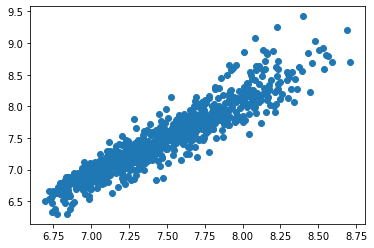

In [15]:
plt.scatter(y_predict,y_test)

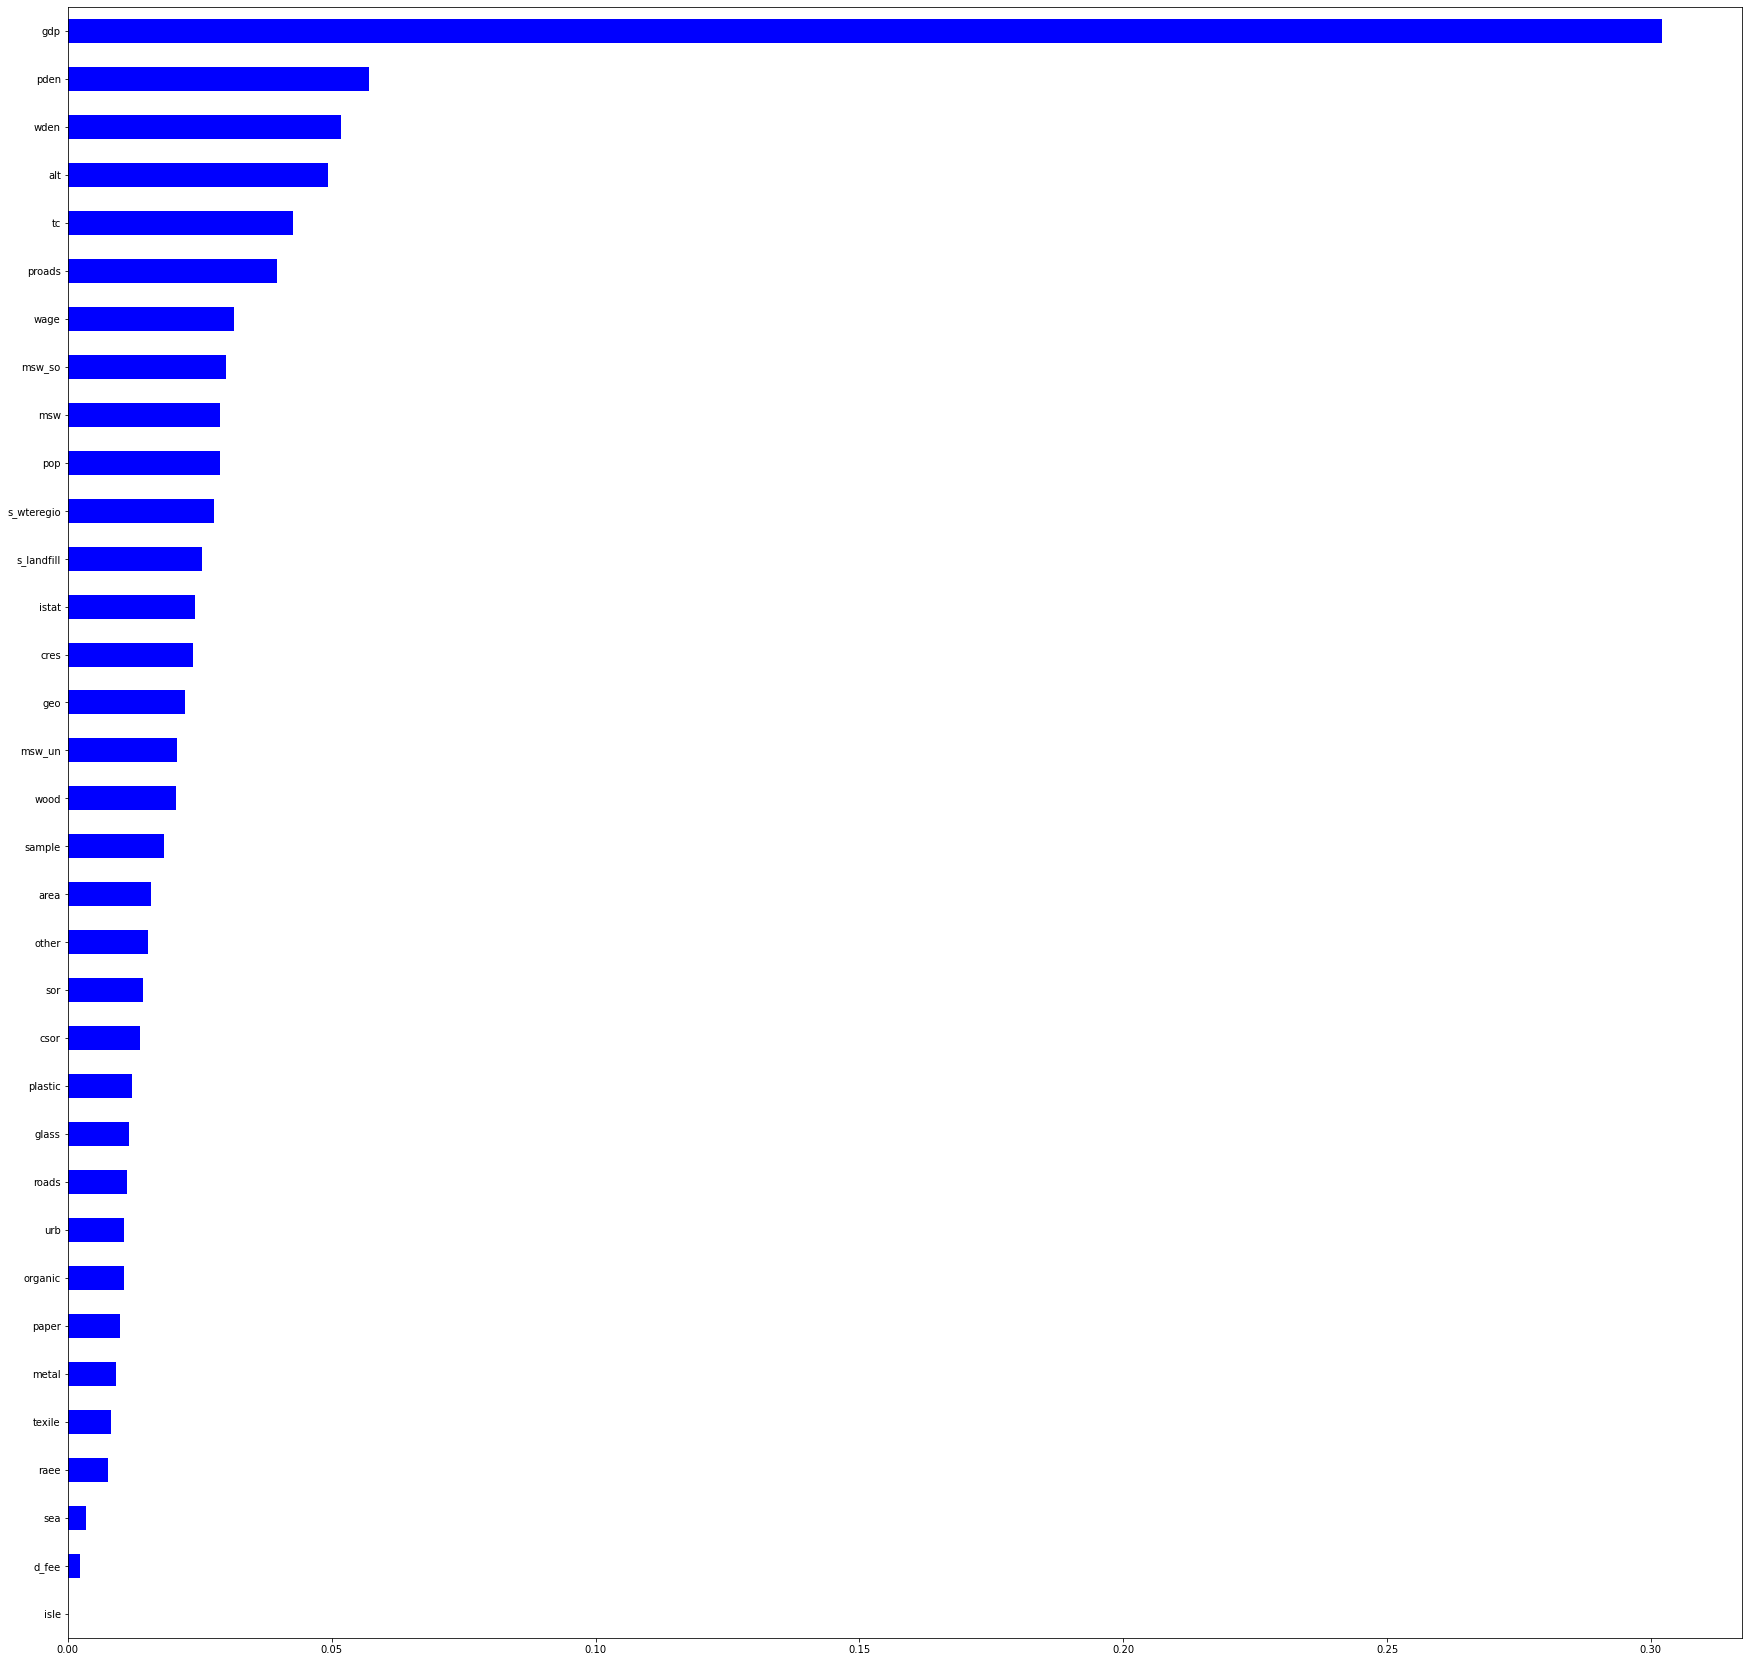

In [23]:
plt.rcParams["figure.figsize"] = (30, 30)
rfcoef.sort_values().plot.barh(color='b')


In [25]:
cv = cross_validate(rf, X, y, cv=5)

In [ ]:
print('5 folds accuracy:',cv['test_score']*100)
print('mean accuracy of 5 folds:',cv['test_score'].mean()*100,'%')

In [39]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'random_state' : [42]
}


In [42]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000],
                         'random_state': [42]},
             verbose=2)

In [29]:
best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)

In [68]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300,
 'random_state': 42}

0                          Abruzzo
1                       Basilicata
2                         Calabria
3                         Campania
4                   Emilia-Romagna
5            Friuli-Venezia Giulia
6                            Lazio
7                          Liguria
8                        Lombardia
9                           Marche
10                          Molise
11                        Piemonte
12                          Puglia
13                        Sardegna
14                         Sicilia
15                         Toscana
16    Trentino-Alto Adige/Südtirol
17                          Umbria
18    Valle d'Aosta/Vallée d'Aoste
19                          Veneto
Name: reg_name, dtype: object


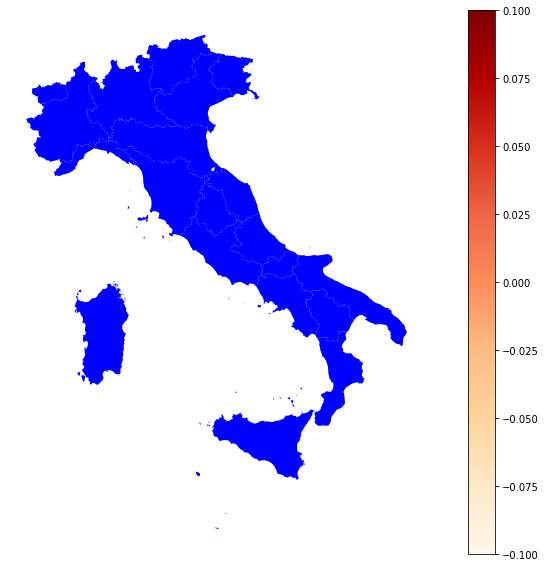

In [125]:
import pandas as pd
import geopandas as gpd

regions = ['Ferrara', 'Barletta-Andria-Trani', 'Roma', 'Venezia', 'Imperia',
       'Padova', 'Savona', 'Udine', 'Trieste', 'Napoli', 'Livorno',
       'Gorizia', 'Oristano', 'Lucca', "Forli'-Cesena", 'Latina',
       'Teramo', 'La Spezia', 'Chieti', 'Trapani', 'Rimini', 'Grosseto',
       'Ravenna', 'Fermo', 'Ascoli Piceno', 'Salerno', 'Pisa', 'Genova',
       'Pescara', 'Sassari', 'Bari', 'Ancona', 'Cosenza', 'Foggia',
       'Cagliari', 'Reggio di Calabria', 'Messina', 'Sud Sardegna',
       'Catania', 'Agrigento', 'Crotone', 'Bologna', 'Caserta', 'Treviso',
       'Verona', 'Pordenone', 'Pesaro e Urbino', 'Mantova', 'Lecce',
       'Nuoro', 'Vicenza', 'Palermo', 'Modena', 'Campobasso', 'Taranto',
       'Siracusa', 'Pistoia', 'Catanzaro', "Reggio nell'Emilia", 'Matera',
       'Cremona', 'Firenze', 'Parma', 'Brindisi', 'Frosinone', 'Piacenza',
       'Brescia', 'Lodi', 'Viterbo', 'Vibo Valentia', 'Benevento',
       'Pavia', 'Prato', 'Massa-Carrara', 'Milano', 'Ragusa', 'Bergamo',
       'Terni', 'Asti', 'Avellino', 'Vercelli', 'Trento', 'Arezzo',
       'Monza e della Brianza', 'Siena', 'Perugia', 'Varese', 'Novara',
       'Sondrio', 'Como', 'Lecco', 'Biella', 'Bolzano', 'Rieti',
       'Isernia', 'Torino', 'Belluno', 'Potenza', 'Caltanissetta',
       "L'Aquila", 'Enna', 'Aosta']


#Download a geojson of the region geometries
gdf = gpd.read_file(filename=r'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson')
gdf = gdf.dissolve(by='reg_name') #The geojson is to detailed, dissolve boundaries by reg_name attribute
gdf = gdf.reset_index()

#gdf.reg_name[~gdf.reg_name.isin(regions)] Two regions are missing in your df
#16    Trentino-Alto Adige/Südtirol
#18    Valle d'Aosta/Vallée d'Aoste

gdf = pd.merge(left=gdf, right=df, how='left', left_on='reg_name', right_on='province')
print(gdf.reg_name)
ax = gdf.plot(
    column="alt",
    legend=True,
    figsize=(15, 10),
    cmap='OrRd',
    missing_kwds={'color': 'blue'});

ax.set_axis_off();

In [115]:
df[df.province=='Emilia-Romagna']

,region,province,name,tc,cres,csor,istat,area,pop,alt,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance


In [87]:

from urllib.request import urlopen
import json
import pandas as pd
from shapely.geometry import shape
import plotly.graph_objects as go
import plotly.express as px

In [17]:
dict_df = pd.DataFrame(list(dict1.items()),columns = ['column1','column2']) 
dict_df=dict_df.sort_values(by=['column2'])
dict_df=dict_df.tail(10)
dict_df

,column1,column2
14,Mantova,0.667858
7,Caserta,0.675037
28,Vicenza,0.698651
13,Lecco,0.705266
15,Milano,0.715642
2,Bergamo,0.740684
19,Pavia,0.743709
26,Udine,0.764309
20,Pordenone,0.778966
25,Sondrio,0.801896


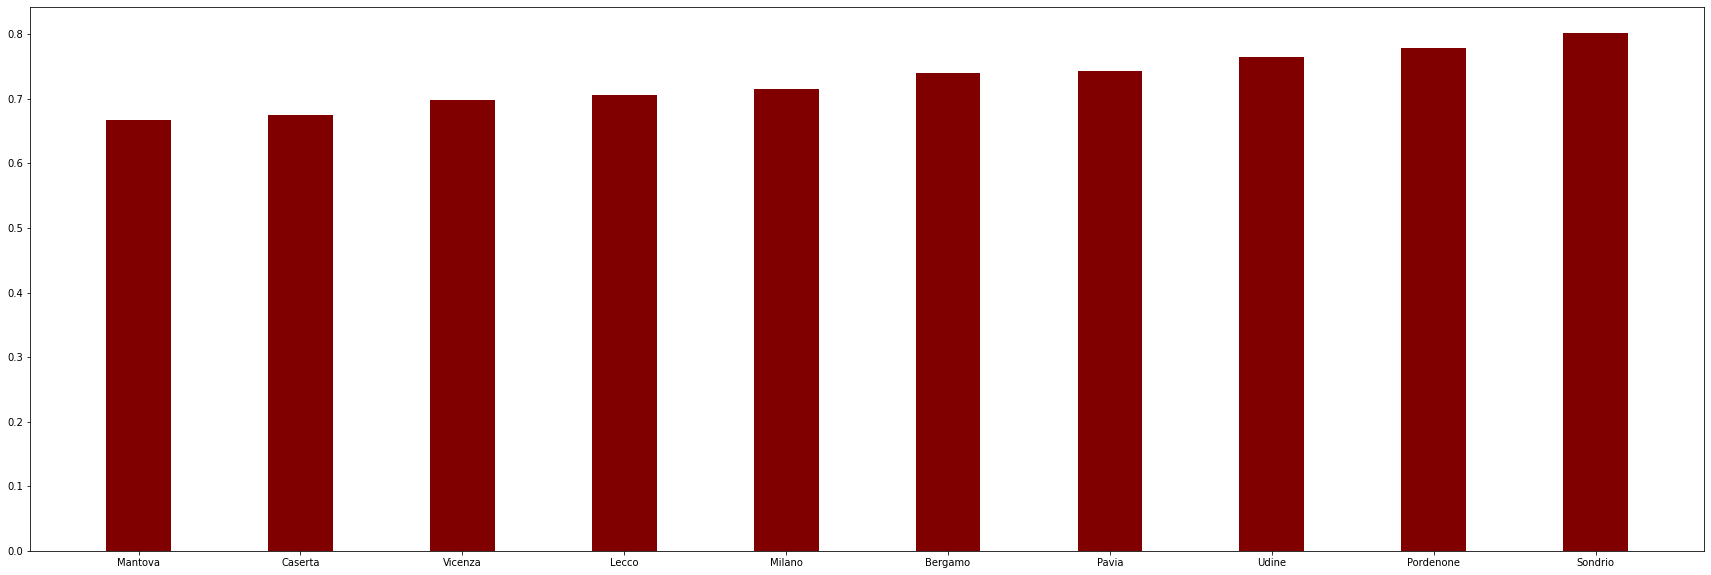

In [18]:
fig = plt.figure(figsize = (30, 10))
import matplotlib.pyplot as plt
import numpy as np

y = dict_df['column2']
mylabels = dict_df['column1']
plt.bar(mylabels, y, color ='maroon',
        width = 0.4)
plt.show()

In [14]:
#pip install geopandas

In [13]:
#pip install scikit-plot

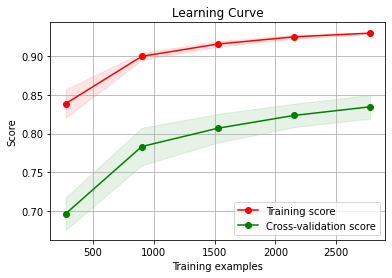

In [12]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(rf,X_train,y_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


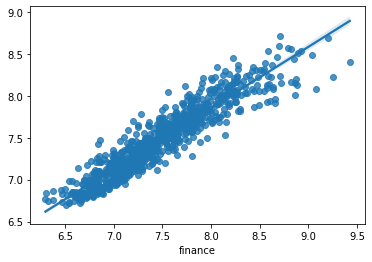

In [19]:
sns.regplot(y_test, y_predict);